In [1]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
dtype_dict = {
    'created_at': 'str',
    'tweet_id': 'str',
    'tweet': 'str',
    'likes': 'int',
    'retweet_count': 'int',
    'source': 'str',
    'user_id': 'str',
    'user_name': 'str',
    'user_screen_name': 'str',
    'user_description': 'str',
    'user_join_date': 'str',
    'user_followers_count': 'int',
    'user_location': 'str',
    'lat': 'float',
    'long': 'float',
    'city': 'str',
    'country': 'str',
    'continent': 'str',
    'state': 'str',
    'state_code': 'str',
    'collected_at': 'str'
}


In [ ]:

biden_tweets = pd.read_csv('hashtag_joebiden.csv',lineterminator='\n')


/var/folders/yc/drdkfqm540l_z3lpnprppnt80000gn/T/ipykernel_60589/984445769.py:1: DtypeWarning:

Columns (3,6,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
trump_tweets = pd.read_csv('hashtag_donaldtrump.csv',lineterminator='\n')

/var/folders/yc/drdkfqm540l_z3lpnprppnt80000gn/T/ipykernel_60589/4070415000.py:1: DtypeWarning:

Columns (1,3,6,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
trump_tweets.head()


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r
0,15/10/2020 00:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,21/10/2020 00:00\r
1,15/10/2020 00:00,1.32E+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4\r
2,15/10/2020 00:00,1.32E+18,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7\r
3,15/10/2020 00:00,1.32E+18,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1\r
4,15/10/2020 00:00,1.32E+18,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5\r


In [ ]:
print(trump_tweets.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at\r'],
      dtype='object')


In [ ]:
columns_to_drop = ['tweet_id', 'user_description', 'collected_at\r']


In [ ]:
trump_tweets = trump_tweets.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
trump_tweets.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,15/10/2020 00:00,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,23/08/2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL
1,15/10/2020 00:00,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,08/07/2011 13:12,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/10/2020 00:00,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,26/08/2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,15/10/2020 00:00,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,05/02/2017 21:32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/10/2020 00:00,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,15/06/2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC


In [ ]:
trump_tweets.loc[:,'condidat'] = 'Trump'
biden_tweets.loc[:,'condidat'] = 'Biden'

In [ ]:
Data_Mixed = pd.concat([trump_tweets,biden_tweets])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,long,city,country,continent,state,state_code,condidat,tweet_id,user_description,collected_at\r
0,15/10/2020 00:00,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,23/08/2011 15:33,1860,...,-80.19366,NaN,United States of America,North America,Florida,FL,Trump,NaN,NaN,NaN
1,15/10/2020 00:00,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,08/07/2011 13:12,1067661,...,NaN,NaN,NaN,NaN,NaN,NaN,Trump,NaN,NaN,NaN
2,15/10/2020 00:00,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,26/08/2007 05:56,1185,...,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump,NaN,NaN,NaN
3,15/10/2020 00:00,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,05/02/2017 21:32,32,...,NaN,NaN,NaN,NaN,NaN,NaN,Trump,NaN,NaN,NaN
4,15/10/2020 00:00,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,15/06/2009 19:05,5393,...,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump,NaN,NaN,NaN


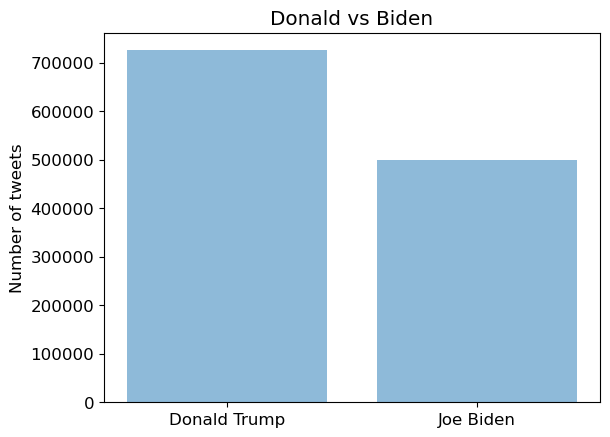

In [ ]:
Trump_tweets_no = Data_Mixed.query('(condidat == "Trump")').tweet.sort_values(ascending=False).count()
Biden_tweets_no = Data_Mixed.query('(condidat == "Biden")').tweet.sort_values(ascending=False).count()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [Trump_tweets_no,Biden_tweets_no]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of tweets')
plt.title('Donald vs Biden')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

2
[0 1]


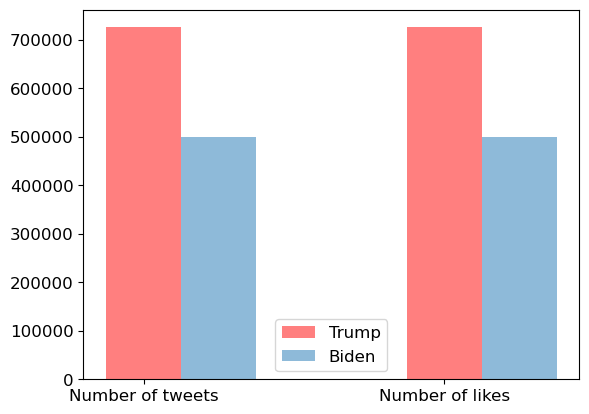

In [ ]:
plt.rcParams.update({'font.size': 12
                     })
Trump_tweets_likes = Data_Mixed.query('(condidat == "Trump")').likes.count()
Biden_tweets_likes = Data_Mixed.query('(condidat == "Biden")').likes.count()

objects = ('Number of tweets','Number of likes')
print(len(objects))
y_pos = np.arange(len(objects))
print(y_pos)
performance = [[Trump_tweets_no,Trump_tweets_likes],[Biden_tweets_no,Biden_tweets_likes]]
plt.bar(y_pos, performance[0], align='center', alpha = 0.5, width = 0.25,color='red')
plt.bar(y_pos+0.25, performance[1], align='center', alpha = 0.5, width = 0.25)
plt.legend(["Trump","Biden"])
plt.xticks(y_pos, objects)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import plotly.graph_objects as go
import io

In [ ]:
from plotly.graph_objs import *
class Chart_builder:
    
    def __init__(self,topic_index,number):
        super().__init__()
        self.topic_index = topic_index
        self.topics_list = ['source','country','state','continent','city']
        self.number      = number
        self.index = self.topics_list[self.topic_index]
        self.Trump_tweets_sources_x = Data_Mixed.query('(condidat == "Trump")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.Trump_tweets_sources_y = Data_Mixed.query('(condidat == "Trump")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
        
        self.Biden_tweets_sources_x = Data_Mixed.query('(condidat == "Biden")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.Biden_tweets_sources_y = Data_Mixed.query('(condidat == "Biden")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
    
    def Builder(self):
        layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
        fig = go.Figure([go.Bar(x = self.Trump_tweets_sources_x, y = self.Trump_tweets_sources_y, name = 'Trump'),
                         go.Bar(x = self.Biden_tweets_sources_x, y = self.Biden_tweets_sources_y, name = 'Biden')], layout=layout)
        # Customize aspect
        fig.update_layout(title_text = 'top '+ str(self.number) + ' ' + self.index)
        fig.update_xaxes(title = 'sources')
        fig.update_yaxes(title = 'tweets count')
        fig.show()

In [ ]:
topic_index = 0
number = 10 
launch = Chart_builder(topic_index,number)
launch.Builder()

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
import re
from textblob import TextBlob

In [ ]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
Data_Mixed['user_followers_count'] = pd.to_numeric(Data_Mixed['user_followers_count'], errors='coerce')


In [ ]:
Trump_Tweets = Data_Mixed.query('(condidat == "Trump")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country','state']]
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'United States of America'][:1000]

Trump_Tweets.reset_index(inplace = True, drop = True)

Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)
Trump_Tweets.head()


Trump_Tweets.head()

,tweet,country,state,ClearTweet,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",United States of America,Illinois,president donald trump s youngest daughter ti...,0.0,0.000,neutral
1,Woah. Have you read this article?\n\nAll the p...,United States of America,California,woah have you read this article all the presi...,0.0,0.000,neutral
2,"#LadyGaga fired back at #DonaldTrump's team: ""...",United States of America,California,ladygaga fired back at donaldtrump s team so...,0.7,0.425,positive
3,🇺🇸 #Decision2020: Decidirse por #Biden o #Trum...,United States of America,Florida,decidirse por biden o trump ha traído gra...,0.0,0.000,neutral
4,#Trump Habla en segundos. Todavía nada está de...,United States of America,Florida,trump habla en segundos todavía nada está def...,0.0,0.000,neutral


In [ ]:
%%time
Trump_Tweets.polarity = Trump_Tweets.polarity.apply(lambda x: getAnalysis(x))

CPU times: user 1.18 ms, sys: 331 µs, total: 1.51 ms
Wall time: 1.85 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

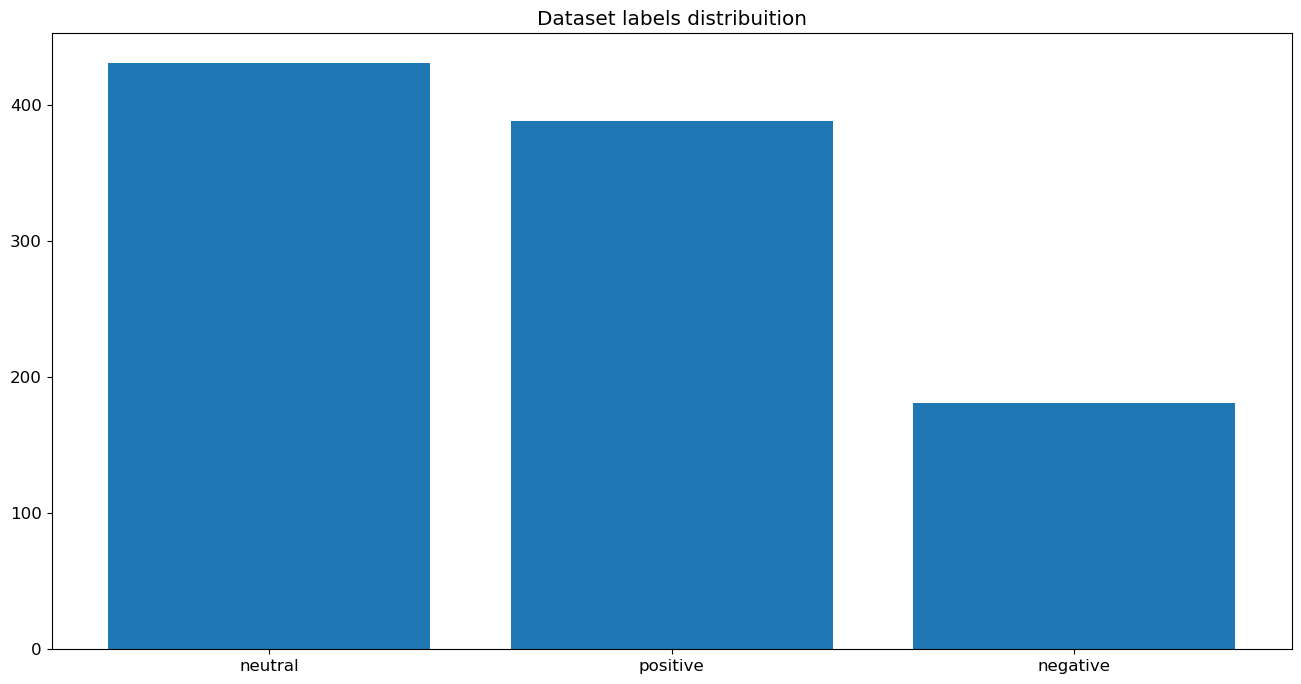

In [ ]:
from collections import Counter

target_cnt_trump = Counter(Trump_Tweets.polarity)
# print(target_cnt)
plt.figure(figsize=(16,8))
plt.bar(target_cnt_trump.keys(), target_cnt_trump.values())
plt.title("Dataset labels distribuition")

In [ ]:
general  = Trump_Tweets.groupby('analysis').analysis.count()
neutral  = Trump_Tweets[Trump_Tweets['analysis'] == 'neutral'].ClearTweet.count()
positive = Trump_Tweets[Trump_Tweets['analysis'] == 'positive'].ClearTweet.count()
negative = Trump_Tweets[Trump_Tweets['analysis'] == 'negative'].ClearTweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [positive,negative,neutral])])
fig.update_layout(title_text ='sentiment analysis tweets Donald Trump')
fig.show()

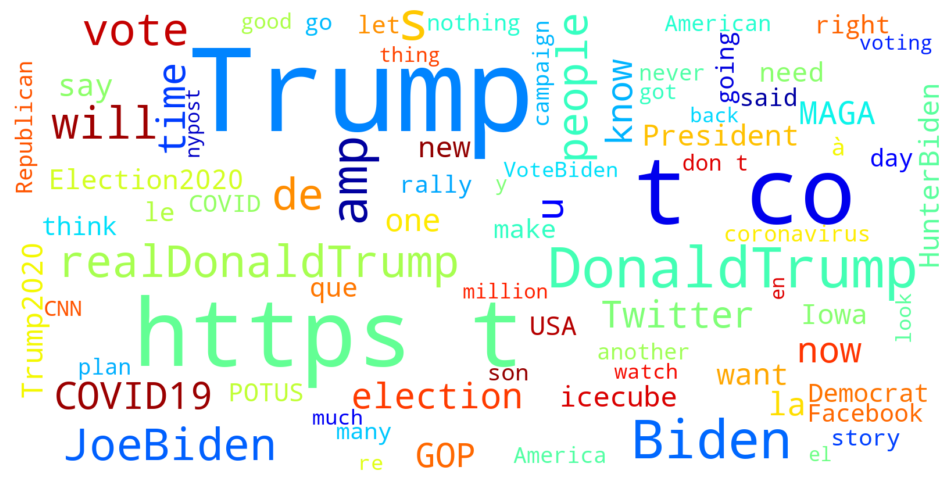

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(trump_tweets['tweet'][0:1000])

In [ ]:
Biden_Tweets = Data_Mixed.query('(condidat == "Biden")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country','state']]
Biden_Tweets = Biden_Tweets.dropna().loc[Biden_Tweets.country == 'United States of America'][:1000]


Biden_Tweets.reset_index(inplace = True, drop = True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

 
Biden_Tweets['subjectivity']= Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity']    = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis']    = Biden_Tweets['polarity'].apply(getAnalysis)
Biden_Tweets.head()


Biden_Tweets.head()

,tweet,country,state,ClearTweet,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,United States of America,California,joebiden is enlisting a list star power to hel...,0.000000,0.000000,neutral
1,The big fight TODAY!!!!! @realDonaldTrump vs #...,United States of America,Nevada,the big fight today vs joebiden who you ...,0.100000,0.000000,neutral
2,#JimmyKimmel offered his view about how the la...,United States of America,California,jimmykimmel offered his view about how the las...,0.177778,-0.077778,negative
3,📌 Las #noticias más importantes de la mañana: ...,United States of America,Florida,las noticias más importantes de la mañana ...,0.000000,0.000000,neutral
4,"Are you there, God? It's me again, Bette. We'r...",United States of America,New York,are you there god it s me again bette we r...,0.383333,0.233333,positive


In [ ]:
Trump_Tweets.head()

,tweet,country,state,ClearTweet,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",United States of America,Illinois,president donald trump s youngest daughter ti...,0.0,neutral,neutral
1,Woah. Have you read this article?\n\nAll the p...,United States of America,California,woah have you read this article all the presi...,0.0,neutral,neutral
2,"#LadyGaga fired back at #DonaldTrump's team: ""...",United States of America,California,ladygaga fired back at donaldtrump s team so...,0.7,positive,positive
3,🇺🇸 #Decision2020: Decidirse por #Biden o #Trum...,United States of America,Florida,decidirse por biden o trump ha traído gra...,0.0,neutral,neutral
4,#Trump Habla en segundos. Todavía nada está de...,United States of America,Florida,trump habla en segundos todavía nada está def...,0.0,neutral,neutral


In [ ]:
gdp_data = pd.read_csv('gdp.csv')

In [ ]:
print(gdp_data.head())

    GeoFIPS          GeoName Region TableName  LineCode  \
0   "00000"  United States *          SAGDP2N       1.0   
1   "00000"  United States *          SAGDP2N       2.0   
2   "00000"  United States *          SAGDP2N       3.0   
3   "00000"  United States *          SAGDP2N       4.0   
4   "00000"  United States *          SAGDP2N       5.0   

  IndustryClassification                                   Description  \
0                    ...                            All industry total   
1                    ...                            Private industries   
2                     11    Agriculture, forestry, fishing and hunting   
3                111-112                                         Farms   
4                113-115     Forestry, fishing, and related activities   

                          Unit       1997       1998  ...        2011  \
0  Millions of current dollars  8577552.0  9062817.0  ...  15542582.0   
1  Millions of current dollars  7431992.0  7871500.0  

In [ ]:
print(gdp_data.columns)

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [ ]:
gdp_filtered = gdp_data[gdp_data['Description'] == 'All industry total']


In [ ]:
gdp_filtered = gdp_filtered[['GeoName', 'Description', '2020']]

In [ ]:
gdp_filtered['2020'] = pd.to_numeric(gdp_filtered['2020'], errors='coerce')

In [ ]:
gdp_filtered.head()

,GeoName,Description,2020
0,United States *,All industry total,20936558.0
96,Alabama,All industry total,224870.6
188,Alaska,All industry total,50246.7
280,Arizona,All industry total,372461.0
372,Arkansas,All industry total,129073.9


In [ ]:
median_gdp = gdp_filtered['2020'].median()


In [ ]:
gdp_filtered['urban_rural'] = gdp_filtered['2020'].apply(lambda x: 'Urban' if x > median_gdp else 'Rural')

In [ ]:
Trump_Tweets = Trump_Tweets.merge(gdp_filtered[['GeoName', 'urban_rural']], left_on='state', right_on='GeoName', how='left')

In [ ]:
Trump_Tweets.drop(columns=['GeoName'], inplace=True)

In [ ]:
Trump_Tweets.head()

,tweet,country,state,ClearTweet,subjectivity,polarity,analysis,urban_rural
0,"President Donald #Trump’s youngest daughter, T...",United States of America,Illinois,president donald trump s youngest daughter ti...,0.0,neutral,neutral,Urban
1,Woah. Have you read this article?\n\nAll the p...,United States of America,California,woah have you read this article all the presi...,0.0,neutral,neutral,Urban
2,"#LadyGaga fired back at #DonaldTrump's team: ""...",United States of America,California,ladygaga fired back at donaldtrump s team so...,0.7,positive,positive,Urban
3,🇺🇸 #Decision2020: Decidirse por #Biden o #Trum...,United States of America,Florida,decidirse por biden o trump ha traído gra...,0.0,neutral,neutral,Urban
4,#Trump Habla en segundos. Todavía nada está de...,United States of America,Florida,trump habla en segundos todavía nada está def...,0.0,neutral,neutral,Urban


In [ ]:
urban_rural_counts = gdp_filtered['urban_rural'].value_counts()

In [ ]:
print(urban_rural_counts)

Urban    30
Rural    30
Name: urban_rural, dtype: int64


In [ ]:

rural_states = Trump_Tweets[Trump_Tweets['urban_rural'] == 'Rural']['state'].unique()

# Print the list of rural states
print("Rural States:")
print(rural_states)


Rural States:
['District of Columbia' 'Nevada' 'Kansas' 'South Carolina' 'Connecticut'
 'Utah' 'Kentucky' 'Nebraska' 'Delaware' 'Missouri' 'Alabama' 'Oklahoma'
 'New Mexico' 'Oregon' 'Idaho' 'Hawaii' 'Arkansas' 'Alaska' 'Louisiana'
 'Rhode Island' 'West Virginia' 'Iowa' 'New Hampshire' 'Montana']


In [ ]:

rural_states = Trump_Tweets[Trump_Tweets['urban_rural'] == 'urban']['state'].unique()

# Print the list of rural states
print("urban States:")
print(urban_states)


urban States:
['California', 'New York', 'Texas', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts', 'Colorado', 'Maryland', 'Indiana', 'Tennessee', 'Missouri', 'Wisconsin', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Iowa', 'Nevada']
